In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('../../data/interim/fraud_detection.csv')

In [3]:
df

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,Unnamed: 33,Unnamed: 34,Unnamed: 35
0,0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,...,1,1,0,Laborers,1.0,2,2,NaN,NaN,NaN
1,1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,...,1,1,0,Core staff,2.0,1,1,NaN,NaN,NaN
2,2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,...,1,1,0,Laborers,1.0,2,2,NaN,NaN,NaN
3,3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,...,1,0,0,Laborers,2.0,2,2,NaN,NaN,NaN
4,4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,...,1,0,0,Core staff,1.0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,...,1,0,0,Sales staff,1.0,1,1,NaN,NaN,NaN
307507,307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,...,1,1,0,NaN,1.0,2,2,NaN,NaN,NaN
307508,307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,...,1,0,1,Managers,1.0,3,3,NaN,NaN,NaN
307509,307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,...,1,0,0,Laborers,2.0,2,2,NaN,NaN,NaN


In [5]:
AIT_DES=-df['AMT_INCOME_TOTAL'].describe()

In [6]:
AIT_DES

count   -3.075110e+05
mean    -1.687979e+05
std     -2.371231e+05
min     -2.565000e+04
25%     -1.125000e+05
50%     -1.471500e+05
75%     -2.025000e+05
max     -1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [9]:
cd = df['OCCUPATION_TYPE'].value_counts()

In [10]:
cd


OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

In [13]:
nnc = df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

In [14]:
nnc

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE']

In [20]:
data=pd.read_csv('fraud_detection.csv',usecols=['TARGET','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',
'AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','OWN_CAR_AGE','CNT_FAM_MEMBERS'])

In [21]:
data

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS
0,1,202500.0,406597.5,24700.5,351000.0,0.018801,-637,-3648.0,-2120,NaN,1.0
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1188,-1186.0,-291,NaN,2.0
2,0,67500.0,135000.0,6750.0,135000.0,0.010032,-225,-4260.0,-2531,26.0,1.0
3,0,135000.0,312682.5,29686.5,297000.0,0.008019,-3039,-9833.0,-2437,NaN,2.0
4,0,121500.0,513000.0,21865.5,513000.0,0.028663,-3038,-4311.0,-3458,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...
307506,0,157500.0,254700.0,27558.0,225000.0,0.032561,-236,-8456.0,-1982,NaN,1.0
307507,0,72000.0,269550.0,12001.5,225000.0,0.025164,365243,-4388.0,-4090,NaN,1.0
307508,0,153000.0,677664.0,29979.0,585000.0,0.005002,-7921,-6737.0,-5150,NaN,1.0
307509,1,171000.0,370107.0,20205.0,319500.0,0.005313,-4786,-2562.0,-931,NaN,2.0


In [23]:
corr_matrix = data.corr()

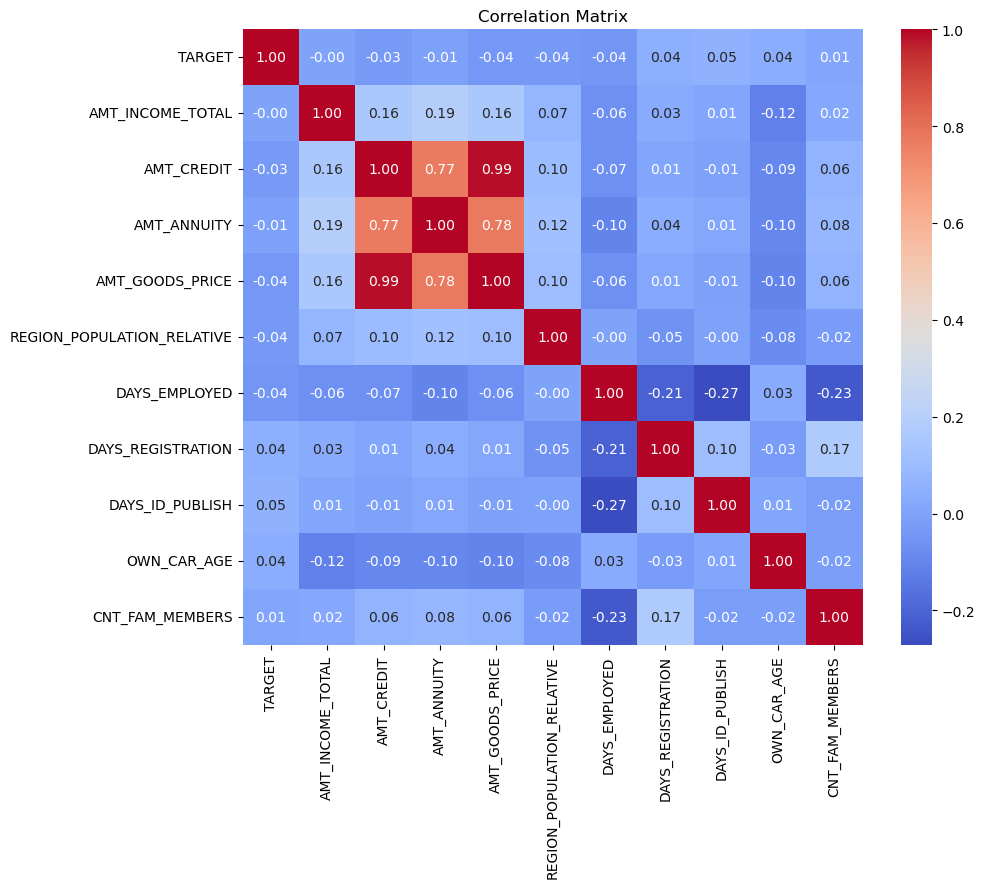

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()